In [3]:
import pandas as pd
import numpy as np

from scipy.fft import fft, fftfreq, ifft, fft2, ifft2, ifftshift
from scipy.signal import blackman
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy.signal import butter
from scipy import signal
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
from scipy.ndimage import gaussian_filter as gf

from xrdc import featurization as feat
from xrdc import fourier
from xrdc import peak_fitting as pf

#pd.options.plotting.backend = "matplotlib"
pd.options.plotting.backend = "plotly"

workflows/alanConfig


In [4]:
from xrdc import source_separation as sep
from xrdc import featurization as feat
from xrdc.datasets import d3d

In [5]:
df = pd.read_csv("YijinXRD.dat", sep = '\t')
qq = df.iloc[:, 0]

patterns = df.iloc[:, 2:]
patterns = (patterns.values.T)[:, 1:]

for i in range(len(patterns)):
    patterns[i] = patterns[i] - i * 1000
    
#patterns = np.vstack((patterns[0][None, :], patterns))

In [6]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25,  threshold = 50, smooth_q = 1.7,
                                                    background_after_filter = False)

(0, 0)


In [7]:
from importlib import reload
reload(feat)

<module 'xrdc.featurization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py'>

Peak at 69, start iteration with error = 0.5832013032160881
Peak at 69, iteration 0: error = 322.4903307414707
Peak at 68, start iteration with error = 0.6126506412724262
Peak at 68, iteration 0: error = 266.5609044939182
Peak at 276, start iteration with error = 0.5759595785118747
Peak at 276, iteration 0: error = 250.91300196711111
Peak at 276, start iteration with error = 0.5857118678270243
Peak at 276, iteration 0: error = 344.6914745627006
Peak at 210, start iteration with error = 0.6255641065190974
Peak at 210, iteration 0: error = 332.5207780154602
Peak at 207, start iteration with error = 0.5589257330354117
Peak at 207, iteration 0: error = 338.90814688037307
26
8.182289029821732


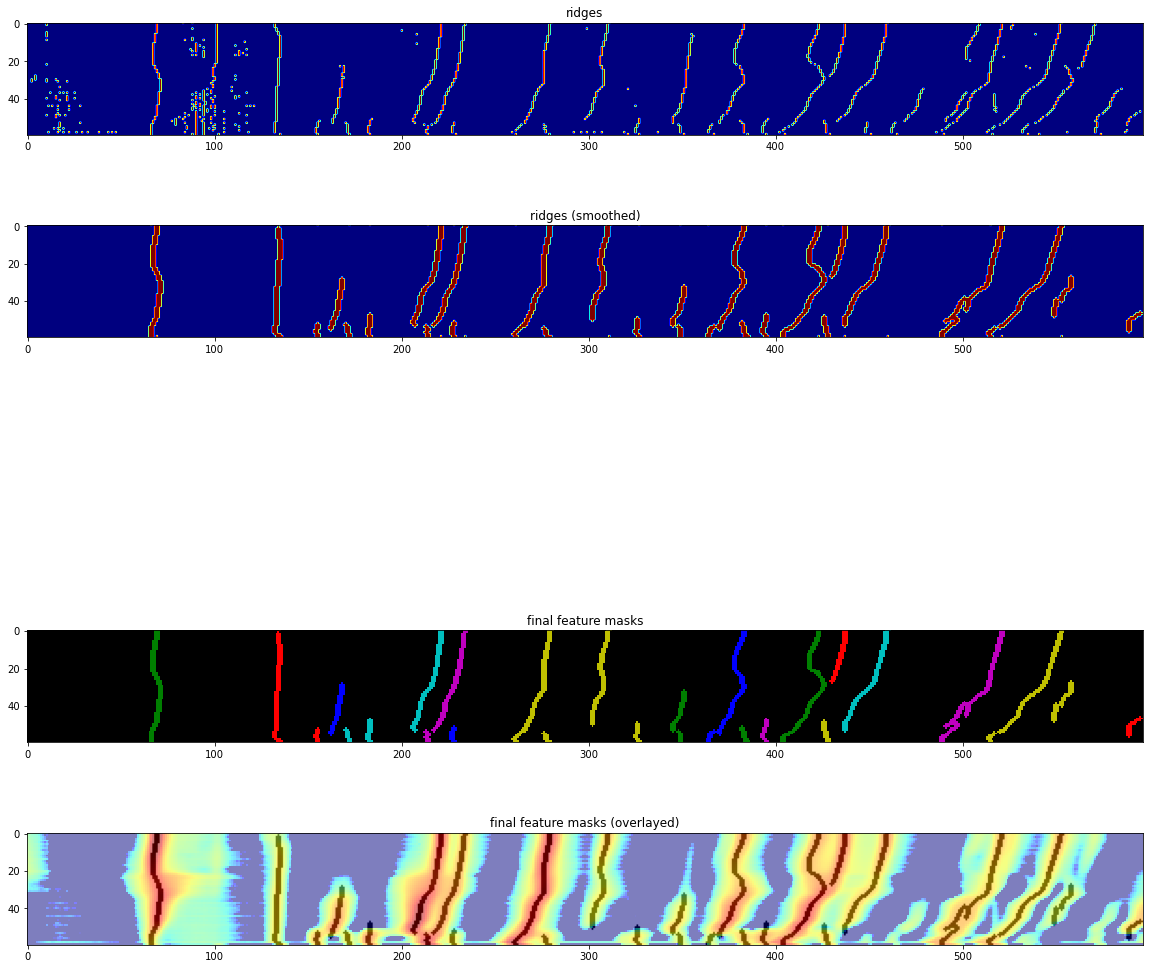

In [8]:
def default_featurize(patterns_pp):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
       smooth_ax1 = 'FWHM', smooth_ax0 = 1, threshold_percentile = 75, thicken = True, size_thresh = 5, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 1, thicken_ax1 = 1, flood_threshold=.95, smooth_factor_ax1 = .125)
    return labeled, feature_masks, activations, norm_, activations_n1


patterns_pp = fast_q * (fast_q > 0)
labeled, feature_masks, activations, _norm, activations_n1 = default_featurize(patterns_pp);

In [9]:
# remove infs 
featmask = ~np.isinf(activations_n1).any(axis = 1)
activations_n1 = activations_n1[featmask]

def norm(arr):
    na = _norm(arr)
    na = na[featmask]
    return na

In [10]:
activations_noise = feat.featurize(feature_masks, fast_T)
# activations_noise = feat.featurize(feature_masks, np.percentile(np.abs(fast_T.T), 68) * np.ones_like(fast_T.T))

do_norm = True

uncertainty = np.abs((norm(activations + activations_noise) - norm(activations)))

-8034.938277645266
8.182289029821732


In [158]:
a, b = 2, 3
#plt.rcParams["figure.figsize"]=(20, 15)
plt.rcParams["figure.figsize"]=(12,8)

/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py:200: RuntimeWarning: invalid value encountered in true_divide
  similarity = np.dot(composition, composition.T) / np.outer(norm, norm)
/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py:208: RuntimeWarning: invalid value encountered in subtract
  dist_l2 = np.sqrt(np.einsum("ijk, ijk->ij", a - b, a - b))


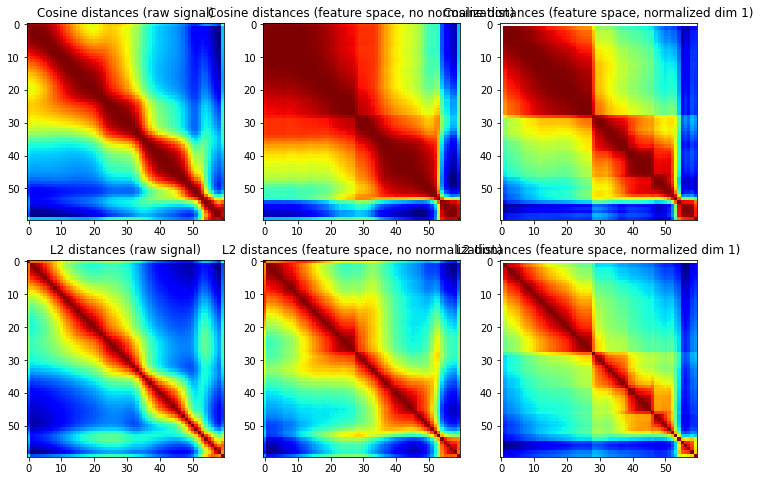

In [141]:
feat.similarity_plot_row(feat.csim_pairs, 'Cosine', patterns_pp, activations_bgsubbed, activations_n1_bgsubbed,
                        a = a, b = b)
feat.similarity_plot_row(lambda arr: -feat.l2_pairs(arr), 'L2', patterns_pp, activations_bgsubbed, activations_n1_bgsubbed, offset = 3,
                        a = a, b = b)

In [196]:
reload(feat)

<module 'xrdc.featurization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py'>

numBlocks: 357, dataPts/Block: 1.6722689075630253
[  0.  34. 126. 182. 229. 262. 296. 341. 407. 429. 447. 500. 511. 538.
 566. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  34., 126., 182., 229., 262., 296., 341., 407., 429., 447.,
       500., 511., 538., 566., 596.])}
Peak at 1, start iteration with error = 0.3504480471016032
Peak at 1, iteration 0: error = 0.5848669327667578
0.01913215337701901
    ----Saving data for block between 1.00 - 33.00
[-0.6, -0.5734261245527356, 2602.3990897967824, 6.033455380077503, 7.917458632036792e-15]
Peak at 70, start iteration with error = 0.5741359455738658
Peak at 70, iteration 0: error = 28.39907360799533
0.15544232743701203
    ----Saving data for block between 34.00 - 125.00
[70.3059123084697, 14.918062749251655, 189324.52209005345, 2.0364561262986123, 0.5017302064923256]
Peak at 133, start iteration with error = 0.26570340709426826
Peak at 133, iteration 0: error = 2.0857681098974004
0.04537752158609095
    ----Saving dat

    ----Saving data for block between 355.00 - 406.00
[383.7362295695763, 174.8661138209059, 15361.723386611746, 2.3955103514157345, 0.2442412513614555, 375.8067440939822, -1075.5281833239096, 1374.6642913441779, 2.5272804342501414, 1.041755877894226e-27, 384.87646591490926, 886.3863724548679, 15746.184816218092, 3.732316443432978, 0.7740787859232727]
Peak at 424, start iteration with error = 0.810496568759
Peak at 424, iteration 0: error = 2.6629928130277154
5.305509093451512
Peak at 424, iteration 1: error = 3.836199233637981
2.992168478257043
Peak at 424, iteration 2: error = 6.993694593474376
    ----Saving data for block between 407.00 - 428.00
[423.9706745708966, -1116.5829006278686, 27177.321096549567, 2.466768693608961, 0.5602403001887337, 428.14792689787083, 758.8456099301721, 6221.325703766245, 2.500689040579313, 5.933591073566787e-06, 419.8590713452325, 334.13031791970866, 1577.939852068637, 4.2055685340472655, 1.152679400375626e-17]
Peak at 438, start iteration with error =

    ----Saving data for block between 339.00 - 406.00
[383.4938170570715, -178.82499260404313, 20665.60320952422, 2.7067861924342, 6.655550295029457e-05, 376.5242600947265, -88.71639002715332, 2239.2734842642376, 3.0703390961437247, 9.435230828080265e-23, 386.55429147304716, 263.3526612481955, 8147.652645925344, 3.3468943601043466, 0.6991039000831155]
Peak at 424, start iteration with error = 0.8130438098953654
Peak at 424, iteration 0: error = 1.0786147861886743
5.271927433108608
Peak at 424, iteration 1: error = 5.203272935651389
3.3885217223578605
Peak at 424, iteration 2: error = 8.575404810868454
    ----Saving data for block between 407.00 - 429.00
[424.6860927119358, -638.8220254668053, 30354.563081575638, 2.9633124704902474, 1.2952375719991034, 429.82534711625516, -1087.7391638160905, 1289.3227949551224, 1.734854766026665, 1.0987702741371612e-10, 423.2033176318511, 1670.5591102857816, 5902.958348388481, 2.14401471525575, 5.732295737339793e-05]
Peak at 438, start iteration with 

Peak at 384, start iteration with error = 0.5687359989631704
Peak at 384, iteration 0: error = 7.267283161662501
6.6756400823826585
Peak at 384, iteration 1: error = 8.052060674943661
5.586885947446759
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Peak at 384, iteration 2: error = 8.043750841790882
    ----Saving data for block between 354.00 - 405.00
[383.33781121291815, 574.40117116552, 21805.554003097965, 2.730692852837666, 0.0003186679225731102, 376.2965201239206, -185.37179812892495, 2381.159227290847, 3.240256905685565, 6.712427981146607e-27, 387.0498190740846, -400.53356011764333, 7395.534393011068, 2.4263253560063656, 1.6634547369343142]
Peak at 424, start iteration with error = 0.8214111416618085
Peak at 424, iteration 0: error = 0.9842652195450318
8.746186965900657
Peak at 424, iteration 1: error = 4.078984564340636
6.457920830595177
Peak at 424, iteration 2: error = 8.151625351403307
    ----Saving data for block between 406.00 - 429.0

Peak at 383, start iteration with error = 0.4370829898570645
Peak at 383, iteration 0: error = 10.31338763340607
5.637099239641954
Peak at 383, iteration 1: error = 11.000047140520035
4.828522013936335
Peak at 383, iteration 2: error = 11.729779141538794
    ----Saving data for block between 339.00 - 405.00
[383.10699765038026, 1744.172579312121, 14206.637007610807, 2.5765357122063404, 2.3499248332905017e-13, 375.13106788660417, -742.0149707618264, 1451.583257539485, 2.7153617491414077, 6.89143712497956e-29, 384.3140869632606, -1007.6703521890564, 14959.829741942865, 3.9945074252423582, 0.5941374762757871]
Peak at 423, start iteration with error = 0.8151496907322541
Peak at 423, iteration 0: error = 0.8551247919427303
20.07939373192189
Peak at 423, iteration 1: error = 18.62486082410408
11.729691691111785
Peak at 423, iteration 2: error = 25.171750975061048
    ----Saving data for block between 406.00 - 428.00
[423.1585641935395, -744.1232797560738, 25428.09677549187, 2.513261949075596

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 499.00 - 509.00
[508.6530671266642, 76.23267702560432, 4490.179456413838, 2.4999999999999996, 1.6634634291363495, 506.4899190669242, -71.72164737926732, 10.826029009091851, 0.3049716988082705, 4.274950700731283e-20, 499.00521303725503, -99.5478790642963, 348.3768037086702, 2.4999999999999996, 7.274582358058647e-31]
Peak at 521, start iteration with error = 0.8715983743950088
Peak at 521, iteration 0: error = 2.066159916387645
48.410562332800254
Peak at 521, iteration 1: error = 0.33096675261339686
24.004146333984483
Peak at 521, iteration 2: error = 0.6134901210711532
    ----Saving data for block between 510.00 - 542.00
[521.2867790771105, -625.2878024748669, 17359.16535369978, 1.8615564324221139, 1.3500302705627358, 527.7430025939516, 477.33741455322155, 6412.711552120729, 1.354236298662263, 2.062238451057269, 508.8048850070738, 106.7043694903608, 2624.9213038178113, 3.428894831341471, 3.3505727489868396e-20]
Peak at 553, start iteration with err

    ----Saving data for block between 446.00 - 498.00
[459.7500410567763, -1072.8413966979233, 10602.238751407645, 4.01877565183416, 1.131632193099201, 443.4000327033433, -396.6784064109556, 8234.588820945648, 8.061025954438673, 6.970679550143998e-05, 459.9794831434441, 1462.9217263577964, 18225.92876575889, 2.299814956889578, 0.0014531806816697249]
Peak at 508, start iteration with error = 0.594629871536904
Peak at 508, iteration 0: error = 3.0565177721043346
3.477311327042932
Peak at 508, iteration 1: error = 1.51889140168415
3.009324421574775
Peak at 508, iteration 2: error = 1.8133465691405495


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 499.00 - 508.00
[508.44999999999993, -96.19149707531, 2736.183548813735, 2.2499999999999996, 0.8137271405841341, 499.34141399130226, 57.602639172936556, 249.06945752576084, 2.2499999999999996, 1.9068605191678e-26, 505.3835234629936, -22.36978207231162, 453.9254816072031, 2.1949964416214307, 6.075556473622922e-35]
Peak at 521, start iteration with error = 0.8156136926432029
Peak at 521, iteration 0: error = 0.3998660550552008
87.3153718402022
Peak at 521, iteration 1: error = 0.24001304015522767
44.841466526209715
Peak at 521, iteration 2: error = 0.13936737554609796
    ----Saving data for block between 509.00 - 536.00
[521.0953183491473, -442.01141128650414, 16691.630058437488, 1.9668830928420524, 1.1981614879901874, 527.4996294159986, 1037.1751260392552, 6329.5679000869495, 1.5453920722437884, 1.9035217893487957, 508.0234095531958, -625.6929397351593, 2854.5901642269823, 3.7189570100383222, 8.100456751721131e-13]
Peak at 553, start iteration with

    ----Saving data for block between 446.00 - 497.00
[459.2680127955882, 1394.8146898914295, 8094.765509177048, 4.9085626410860685, 0.519112579125982, 443.4500203777584, -292.6192748904058, 7516.10795766954, 7.1302481170574765, 0.0017599899490429395, 459.76409482598245, -1106.4913907667817, 20205.167572808008, 2.283393475056534, 0.1697475326822]
Peak at 508, start iteration with error = 0.6233524624631765
Peak at 508, iteration 0: error = 3.370401848298155
6.238215367458365
Peak at 508, iteration 1: error = 4.157194070753689
5.06908069250548
Peak at 508, iteration 2: error = 0.7745275457764532


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 498.00 - 508.00
[507.8714474455861, -35.503981453651, 2285.914730352716, 2.4999999999999996, 0.20329053269575542, 504.76095730560553, -19.086945675234894, 381.9580898787475, 1.922398469225892, 3.647124416979285e-32, 498.72777566541805, 0.12218189962166792, 466.4716493147447, 2.4999999999999916, 1.514292725817199]
Peak at 521, start iteration with error = 0.8657609217442871
Peak at 521, iteration 0: error = 1.0248620494958043
66.50808769053093
Peak at 521, iteration 1: error = 0.2795335367672854
43.05650850938944
Peak at 521, iteration 2: error = 0.4373420257670195
    ----Saving data for block between 509.00 - 541.00
[521.4933004409357, -431.1367043616067, 17031.759671121785, 0.5875045662496226, 2.4542021614282423, 527.4485994364338, -436.6981033083208, 2984.4529165160443, 2.411828779765663, 4.017447979750275e-31, 519.5527386237702, 891.0339323598406, 2326.678085103486, 1.6358517492261222, 1.907224233094325e-28]
Peak at 552, start iteration with er

    ----Saving data for block between 450.00 - 484.00
[459.5342739440465, 597.0321678343222, 28731.573981967376, 2.043264912765121, 0.9511321178201387, 448.30000000000007, -478.5284377168541, 3790.114882058391, 5.584994825224069, 4.7129355320458073e-36, 455.04149742355816, -147.277552768376, 169.7227885965885, 1.7113783841964045, 1.5680314588991335e-33]
Peak at 507, start iteration with error = 0.28906913361602754
Peak at 507, iteration 0: error = 1.595006305490293
0.9528665443900733
    ----Saving data for block between 485.00 - 508.00
[507.0348298449533, -1.4171122271767091, 2165.065094869972, 2.8505239963553946, 2.021710716590728e-15]
Peak at 521, start iteration with error = 0.9407010071032631
Peak at 521, iteration 0: error = 2.7136578559681026
26.033485339480052
Peak at 521, iteration 1: error = 0.9353810930845909
16.643275632866967
Peak at 521, iteration 2: error = 2.0718720837779574
    ----Saving data for block between 509.00 - 541.00
[521.3137946844868, -330.7454774243982, 17

Peak at 459, start iteration with error = 0.7680739382908203
Peak at 459, iteration 0: error = 15.292768056748342
15.870249089812026
Peak at 459, iteration 1: error = 4.047215908351788
4.379353861258471
Peak at 459, iteration 2: error = 5.774388893127674
    ----Saving data for block between 446.00 - 484.00
[459.2228123074791, 1108.169500974822, 25286.851548475173, 2.127073994692677, 1.1500860591269757, 444.1000000000001, -77.88724758728716, 7812.183983731542, 7.961558116945724, 2.4512080482628233e-27, 459.4048180032359, -1055.6076696538996, 3172.0693436235742, 1.9759165332389663, 2.7764010983535276e-05]
Peak at 506, start iteration with error = 0.30140270345439907
Peak at 506, iteration 0: error = 1.3475044940138186
0.5525355070378896
    ----Saving data for block between 485.00 - 507.00
[506.2646717392823, -1.2811134872047063, 2175.3650700666117, 2.900005461707506, 1.2061026701094953e-22]
Peak at 520, start iteration with error = 0.7583690530184812
Peak at 520, iteration 0: error = 0

Peak at 506, start iteration with error = 0.5770023887719231
Peak at 506, iteration 0: error = 2.1222451832779017
1.0806960217840005
    ----Saving data for block between 496.00 - 507.00
[505.7879792204621, -4.882112072808059, 1857.0032072086744, 2.7499999999999996, 8.289531737917503e-16]
Peak at 520, start iteration with error = 0.8913427589872793
Peak at 520, iteration 0: error = 4.852719533039831
21.76362002295594
Peak at 520, iteration 1: error = 3.573013734624378
11.450439098334003
Peak at 520, iteration 2: error = 4.841791644485409
    ----Saving data for block between 508.00 - 540.00
[520.0694581613766, 130.05423526133046, 15622.266063050212, 2.1411560378556898, 1.0279137660184348, 526.417169635663, 391.7743245011366, 5442.704830768003, 2.0801711472635813, 1.3149882850844312, 506.40000000000003, -555.5609741644189, 2368.571031304527, 2.3640509242718495, 1.7224063387628383]
Peak at 551, start iteration with error = 0.9218175414784133
Peak at 551, iteration 0: error = 0.4256226065

Peak at 505, iteration 0: error = 1.7561297103159743
1.5911587838732817
    ----Saving data for block between 496.00 - 506.00
[504.99502242851787, -7.259540517131137, 1678.7715228884113, 2.4999999999999987, 0.23659106926982168]
Peak at 520, start iteration with error = 0.7256104474529675
Peak at 520, iteration 0: error = 0.355959336243448
41.94694775654181
Peak at 520, iteration 1: error = 0.25394138494800067
24.442619838983735
Peak at 520, iteration 2: error = 0.26472176649034584
    ----Saving data for block between 507.00 - 533.00
[519.8475812301916, -273.6573118849489, 12010.668716174849, 2.8062838027426262, 8.727262570886086e-34, 526.1612980124529, 681.76421677941, 3474.809082665803, 2.4015043824714777, 2.1688411138454098e-32, 519.4886731409888, -281.9249147143082, 502.1356874383649, 1.5253637963072642, 2.705531586993338e-33]
Peak at 551, start iteration with error = 0.8272657592738241
Peak at 551, iteration 0: error = 0.4969789389225398
5.2695669584048765
Peak at 551, iteration 1

Peak at 505, start iteration with error = 0.649753842727871
Peak at 505, iteration 0: error = 2.2805733255131337
4.7484626777903856
Peak at 505, iteration 1: error = 2.657249806290935
4.036223896819238
Peak at 505, iteration 2: error = 3.299555846788197
Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving data for block between 495.00 - 509.00
[504.93117062520884, -6.578014452148905, 1574.3455898425423, 3.053506763128474, 6.230078666944917e-14, 508.86000000195884, -2.295926059788783, 36.67030099288258, 0.6075554401001283, 8.313742669784043e-15, 503.0576666034228, -3.4891029664551265, 52.33652196579996, 1.0331716955586479, 3.696786946800214e-17]
Peak at 520, start iteration with error = 0.9121261044864987
Peak at 520, iteration 0: error = 0.6375560166228725
40.83414745603582
Peak at 520, iteration 1: error = 1.5639865772888764
26.12288986711319
Peak at 520, iteration 2: error = 2.099287942074058
    ----Saving data for block between 510.00

    ----Saving data for block between 449.00 - 494.00
[458.1605517114891, -887.8677085843594, 17446.8145232664, 2.2754445107667975, 0.3222593714130058, 446.75000000000006, 1744.5114526920074, 2705.0901575621538, 3.7087575758130633, 4.8033566088942275e-21, 457.02029918633133, -860.3825525714207, 7251.488183638829, 5.793715511723812, 1.3472430766746922e-20]
Peak at 504, start iteration with error = 0.4890280330715915
Peak at 504, iteration 0: error = 1.7487745368604943
2.534899538384406
Peak at 504, iteration 1: error = 2.494834643261712
1.9273531177520198
    ----Saving data for block between 495.00 - 504.00
[503.7083524612915, -48.37809647930663, 572.063135383878, 1.3486228866616485, 1.2919141330551365e-33, 501.60234403577465, 48.29593442888285, 161.02309680234904, 0.9407933009623142, 9.90998723633118e-34]


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 519, start iteration with error = 0.899391146316226
Peak at 519, iteration 0: error = 3.2956000644061767
37.36688264582396
Peak at 519, iteration 1: error = 4.332593098490034
19.958800660779843
Peak at 519, iteration 2: error = 5.594114456080695
    ----Saving data for block between 505.00 - 539.00
[519.1103429599086, 307.08474052631885, 14040.038610085569, 2.260115180660242, 0.8588216173556615, 525.5671502802434, 199.64875842101983, 5011.406468851602, 2.012688050417278, 1.317503139944782, 504.23360289154834, -535.4903607903229, 1173.2273304874548, 2.995004314135861, 3.8353298068864873e-19]
Peak at 550, start iteration with error = 0.9273402012278847
Peak at 550, iteration 0: error = 0.3753858565281052
8.173218481920614
Peak at 550, iteration 1: error = 0.18329215850923494
6.4991728350949405
Peak at 550, iteration 2: error = 0.24382487024687297
    ----Saving data for block between 540.00 - 559.00
[550.2230941145905, -575.2960024787533, 15974.420515318603, 2.7595804641351327, 1

Peak at 503, start iteration with error = 0.4469103483284878
Peak at 503, iteration 0: error = 1.2138333767116343
1.8529123345799465
    ----Saving data for block between 494.00 - 504.00
[503.28964624503027, -1.9844942455519998, 758.7304786811471, 2.0433939713555502, 2.737053212675181e-21]
Peak at 519, start iteration with error = 0.7296407201714713
Peak at 519, iteration 0: error = 0.6479810454159836
34.65749484991322
Peak at 519, iteration 1: error = 0.4840928120663433
20.417188340619642
Peak at 519, iteration 2: error = 0.473827774925978
    ----Saving data for block between 505.00 - 532.00
[518.8334612475212, 220.70158244430027, 11120.134436680664, 2.816459791850535, 1.5849195577145585e-15, 525.2596592658093, -238.76264856114446, 3692.2453298522864, 2.583151198228544, 9.139081500377844e-32, 518.9409079716984, 83.4286525740746, 527.9259407588273, 1.5658066874720495, 1.659647243720289e-34]
Peak at 550, start iteration with error = 0.8051427232983521
Peak at 550, iteration 0: error = 

Peak at 503, start iteration with error = 0.4492685511305986
Peak at 503, iteration 0: error = 2.1358748378223855
6.716181909896543
Peak at 503, iteration 1: error = 2.3157574696062597
5.799849782852114
Peak at 503, iteration 2: error = 2.4425107569304907


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 494.00 - 504.00
[502.65029799023023, -36.86589761959972, 462.4975851156752, 1.3910933994500556, 2.1563221958464042e-18, 500.56497345475043, -23.655883592896284, 61.46100575455173, 0.5164432193692371, 3.360517552593285e-35, 503.9999594976985, 60.297482869869626, 1.8727381592291188, 0.014243208466149612, 2.888735763053233e-08]
Peak at 519, start iteration with error = 0.8686516711425516
Peak at 519, iteration 0: error = 1.9846143630953914
43.32092496102743
Peak at 519, iteration 1: error = 5.0971001054114495
28.482772052307386
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Peak at 519, iteration 2: error = 4.970083016119952
    ----Saving data for block between 505.00 - 538.00
[518.4973094808014, -494.33801066176426, 12933.33738696341, 2.424296783242632, 0.6372788878084824, 524.8333676630865, 973.4058632511664, 3349.159507023157, 2.437981639369703, 1.334640093813373e-32, 528.2071923394831, -462.05144298810956, 3

Peak at 457, start iteration with error = 0.5518184114412225
Peak at 457, iteration 0: error = 15.12960099732789
32.47458161873476
Peak at 457, iteration 1: error = 11.293669335541495
12.395284477044402
Peak at 457, iteration 2: error = 13.678307328258931
    ----Saving data for block between 445.00 - 492.00
[457.1123268306983, -78.87226883500858, 19414.918800695723, 1.9425456712947895, 1.189879243688047, 442.887953674806, 82.01156441272428, 9747.908042941344, 8.48912634898006, 3.308194289695168e-33, 458.0773345726086, -21.254731864427242, 2181.6559576167624, 2.200057619739833, 0.6397326253389991]
Peak at 518, start iteration with error = 0.7630081373524998
Peak at 518, iteration 0: error = 4.9986681914267015
43.44192382612004
Peak at 518, iteration 1: error = 5.086372835978537
26.010472085495795
Peak at 518, iteration 2: error = 5.086372807727752
    ----Saving data for block between 493.00 - 538.00
[518.1129513937242, -284.8247277487819, 13138.869228860021, 2.248750156435605, 0.94657

Peak at 457, start iteration with error = 0.5464666236802657
Peak at 457, iteration 0: error = 6.074874661219197
9.973470782148842
Peak at 457, iteration 1: error = 11.465825884750991
5.190791520400691
Peak at 457, iteration 2: error = 11.465849553216692
    ----Saving data for block between 448.00 - 492.00
[456.91464287285896, 1335.5675091332344, 20299.412487404137, 1.9703023759747236, 1.1566654316951577, 445.80054749612344, -647.5361079522901, 13227.094984394244, 2.22214310086483, 7.599432059080538, 489.54072655223314, -775.0584575732383, 1989.075935273137, 10.99956245081313, 3.6133796381205556]
Peak at 518, start iteration with error = 0.8433191062933553
Peak at 518, iteration 0: error = 3.0190819666174127
16.31579855713424
Peak at 518, iteration 1: error = 3.417101085884667
10.927589779099048
Peak at 518, iteration 2: error = 5.495768230470822
    ----Saving data for block between 493.00 - 532.00
[503.0474685926691, -474.068915226127, 793.086816657474, 2.8740453213003914, 6.3133768

Peak at 518, start iteration with error = 0.8358740876064673
Peak at 518, iteration 0: error = 1.6074659348937246
22.37707188856325
Peak at 518, iteration 1: error = 4.947572714816329
15.215187781494663
Peak at 518, iteration 2: error = 5.724700897580307
    ----Saving data for block between 493.00 - 531.00
[517.5139517186417, -445.67322054519286, 12506.547137359694, 2.258748579243209, 1.0058977146408636, 524.0001929048918, 447.0149986263295, 4038.6857065074496, 2.1743667984326907, 0.8351317184518253, 503.17843589638136, -15.089470892132816, 631.9199765394599, 2.772988987999607, 7.150514570580265e-05]
Peak at 549, start iteration with error = 0.4876079992309135
Peak at 549, iteration 0: error = 6.812629591850744
7.0430528142834
Peak at 549, iteration 1: error = 4.415559075426977
4.3653822953504475
Peak at 549, iteration 2: error = 5.313053238234205
    ----Saving data for block between 532.00 - 595.00
[548.6529446201981, -496.68624576694964, 13614.829419338055, 2.4799640835238894, 0.71

Peak at 517, start iteration with error = 0.8180813178150466
Peak at 517, iteration 0: error = 3.956697026028121
31.005250688615288
Peak at 517, iteration 1: error = 5.20238722247722
16.310351302073016
Peak at 517, iteration 2: error = 6.671846260077285
    ----Saving data for block between 492.00 - 531.00
[517.2264494328095, -437.81894699943285, 12628.524385203653, 2.1654001355821877, 1.1968396758890536, 523.688551843584, 822.7596029305553, 3827.1987669579003, 2.1562808043327695, 0.7889249818102164, 503.10907565500105, -398.96910074768294, 665.5940229427636, 2.9631701044057777, 3.533785154841252e-07]
Peak at 548, start iteration with error = 0.5066532464060792
Peak at 548, iteration 0: error = 5.745184109278695
10.753921723530954
Peak at 548, iteration 1: error = 3.7340370270471137
7.247286823731587
Peak at 548, iteration 2: error = 4.871480575961399
    ----Saving data for block between 532.00 - 595.00
[548.3338890559916, -484.96077759458586, 13116.50248403063, 2.482033412093084, 0.6

Peak at 548, start iteration with error = 0.4996948112448762
Peak at 548, iteration 0: error = 5.608818954727057
7.3253295779088505
Peak at 548, iteration 1: error = 2.8528970345407747
5.2938293602940245
Peak at 548, iteration 2: error = 3.765521313623495
    ----Saving data for block between 538.00 - 595.00
[548.0013418421129, -255.7057192042125, 12259.045115642657, 2.546511728395155, 0.5367899665129328, 565.9700504573814, -465.75307107220453, 408.4818866034054, 1.882013116768437, 5.738976887302227e-12, 555.1196529635446, 717.0185554202734, 591.1261433134363, 2.878553248750564, 3.613545448485288e-11]
numBlocks: 391, dataPts/Block: 1.526854219948849
[  0.  31. 125. 170. 226. 259. 300. 346. 405. 424. 444. 490. 532. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  31., 125., 170., 226., 259., 300., 346., 405., 424., 444.,
       490., 532., 596.])}
Peak at 1, start iteration with error = 0.42802900588612913
Peak at 1, iteration 0: error = 2.6072808776420184
0.924671772

Peak at 68, start iteration with error = 0.5909360068013326
Peak at 68, iteration 0: error = 35.275200142846714
10.371319855965481
Peak at 68, iteration 1: error = 17.980360185733144
6.983299613642998
Peak at 68, iteration 2: error = 17.98036022008253
    ----Saving data for block between 31.00 - 124.00
[67.99811018719508, 1910.0318938074065, 75047.87362521385, 2.401686424418606, 0.1452859692143908, 72.65591610234976, -3203.043719879776, 39731.26437419377, 0.00014731079710700347, 6.1890493191455125, 26.397003423694592, 1249.817558324321, 1.0613763726792254e-29, 23.21097861520129, 23.225268016579967]
Peak at 135, start iteration with error = 0.2490497599727272
Peak at 135, iteration 0: error = 1.8361574579398048
2.641916310281979
Peak at 135, iteration 1: error = 2.33336911984705
1.9714442343937526
    ----Saving data for block between 125.00 - 183.00
[135.35710387635993, -327.15187157933656, 6446.094351875235, 2.2559573073640706, 0.03244863827234159, 130.18448306510678, 326.77740185995

    ----Saving data for block between 30.00 - 124.00
[68.05920333500057, 413.1427005060818, 42706.98161873922, 2.323742165455556, 0.0004618778093096876, 69.33367929932417, -3412.867311274374, 45948.61106425692, 3.7797512344409467, 0.7723854397153909, 78.05271540660475, 2923.2385115198026, 41220.556773280885, 0.004213616515479, 9.433244400210546]
Peak at 135, start iteration with error = 0.2249205173140365
Peak at 135, iteration 0: error = 1.1790230127844874
2.7381190696808755
Peak at 135, iteration 1: error = 1.6263768217322059
2.0768177271913744
Peak at 135, iteration 2: error = 1.6263768125049531
    ----Saving data for block between 125.00 - 184.00
[135.28129889196111, -324.55622490279893, 6287.739487819885, 2.2608231277381687, 0.00016605194448465784, 130.31111939978828, 343.2437354010889, 135.80981542509247, 2.184291195683583, 6.005695387169667e-11, 122.15253375578037, -19.124567746929333, 0.599140412196603, 14.749999988686428, 14.749999999698558]
Peak at 219, start iteration with 

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 595, iteration 0: error = 2.070808070852377e-05
6.591191888457242e-06
    ----Saving data for block between 592.00 - 595.00
[594.999999954226, -3.4245021134508363e-05, 0.0658936267399117, 0.07206500762829131, 0.0035666130002791827]
numBlocks: 386, dataPts/Block: 1.5466321243523315
[  0.  30. 125. 186. 224. 258. 300. 344. 406. 425. 446. 487. 532. 590.
 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  30., 125., 186., 224., 258., 300., 344., 406., 425., 446.,
       487., 532., 590., 596.])}
Peak at 1, start iteration with error = 0.34805056348371555
Peak at 1, iteration 0: error = 0.8753885258200149
0.49388300188378054
    ----Saving data for block between 1.00 - 29.00
[-0.3999999999983915, -1.4402358824428072, 2492.750403517428, 5.636919834906175, 1.4167871923263335e-20]
Peak at 69, start iteration with error = 0.6665814540621461
Peak at 69, iteration 0: error = 68.55349047664801
17.083858227349197
Peak at 69, iteration 1: error = 27.679140793776103
11.914317

Peak at 69, start iteration with error = 0.6676524004645032
Peak at 69, iteration 0: error = 56.957379776400714
26.564106725732294
Peak at 69, iteration 1: error = 29.309837851305392
18.9738865725758
Peak at 69, iteration 2: error = 29.30983765016752
    ----Saving data for block between 29.00 - 127.00
[69.22648084011817, 1278.65053783312, 58429.4902050699, 3.1403219721402245, 9.556710892787764e-33, 73.03188775868892, -1771.7896056042669, 56875.776292639704, 6.3053349507467455, 2.242652888133843, 84.00594659929055, 442.9664679891094, 25958.201205472786, 15.845336555537418, 1.7086212683578972e-28]
Peak at 135, start iteration with error = 0.3787509084923458
Peak at 135, iteration 0: error = 2.116805713482604
2.424095846306926
Peak at 135, iteration 1: error = 2.757614597395797
1.7396540820147142
    ----Saving data for block between 128.00 - 161.00
[135.1336496514533, -326.52492201495926, 6249.751810912861, 2.251575719304494, 6.968606460760433e-06, 130.3129983000039, 325.77985551079416,

    ----Saving data for block between 15.00 - 127.00
[69.75525838782468, 3359.6856048959075, 74927.21838432005, 3.382910579982491, 0.223733597660715, 76.5375457982346, -2808.787735532765, 72821.14752441048, 1.8682010278571152e-06, 7.838006620930216, 18.82357336496726, -668.0217852613285, 1292.577029483302, 9.255494787134792, 1.4980016553944212e-36]
Peak at 135, start iteration with error = 0.375143388126168
Peak at 135, iteration 0: error = 1.3772469174716324
1.4256309531748916
    ----Saving data for block between 128.00 - 161.00
[135.05792277509613, -1.5718777435228044, 6326.299915963658, 2.1913152931806383, 0.1297957927258817]
Peak at 170, start iteration with error = 0.4323356013181379
Peak at 170, iteration 0: error = 0.8959055800189747
0.6443560448201271
    ----Saving data for block between 162.00 - 185.00
[169.31057037153903, -1.1095343788872711, 359.0103380822091, 3.244501074251066, 6.220869040904936e-25]
Peak at 218, start iteration with error = 0.7924825378608542
Peak at 218

[170.26880118041342, 18.023299898930098, 380.0738862915107, 2.5786660215612205, 2.4213060917769422e-05, 166.24185283409187, -18.575481530638427, 207.84726979388358, 2.0980003254183557, 8.327031524930184e-14]
Peak at 218, start iteration with error = 0.7873304116026322
Peak at 218, iteration 0: error = 43.10618398381066
59.54280634412682
Peak at 218, iteration 1: error = 12.808349918765817
40.797199573762896
Peak at 218, iteration 2: error = 15.869131797907857
    ----Saving data for block between 186.00 - 223.00
[218.2143887708453, -1155.8648044348092, 30245.890853784425, 2.1463370683504506, 0.8042988754506412, 214.97757186466836, 2314.205383820346, 137858.78105718078, 2.453497157786396, 9.249540302220328, 185.12266779443354, -2018.9144571572915, 5351.256540235646, 6.139186351866153, 6.376984168057712e-34]
Peak at 230, start iteration with error = 0.5261167677127915
Peak at 230, iteration 0: error = 6.735472150306024
94.27963565791387
Peak at 230, iteration 1: error = 37.40871468193757

    ----Saving data for block between 225.00 - 257.00
[230.30355947856663, -386.2846569912586, 21776.363150796544, 2.402120297022093, 0.7419448250410328, 226.1351990011424, 1181.3460898420967, 4804.859803775124, 1.848339932382046, 2.486913251225179e-27, 225.26575533236456, -814.4892490000348, 1080.0210848204892, 0.49623605168544893, 3.164416323566844e-27]
Peak at 277, start iteration with error = 0.787947977937004
Peak at 277, iteration 0: error = 5.659539666871153
1.4024553050122153
    ----Saving data for block between 258.00 - 298.00
[277.235702993426, -187.10612557565133, 119409.0870806593, 2.0159368511592564, 1.4498446736077657]
Peak at 309, start iteration with error = 0.47557434811675464
Peak at 309, iteration 0: error = 2.574831622890196
1.1184300738665856
    ----Saving data for block between 299.00 - 339.00
[309.06108279205876, -6.41983598131738, 5753.814888733255, 2.977492716308862, 0.9807335074804494]
Peak at 383, start iteration with error = 0.5086804331149251
Peak at 383,

Peak at 309, start iteration with error = 0.5219028444860553
Peak at 309, iteration 0: error = 3.200027098997316
1.6323259050068635
    ----Saving data for block between 298.00 - 340.00
[309.1108159552022, -11.92309787292989, 7252.839912060286, 2.6257435658985897, 1.7101223321888623]
Peak at 384, start iteration with error = 0.5788991589440423
Peak at 384, iteration 0: error = 15.877441965506803
7.130756274191504
Peak at 384, iteration 1: error = 15.266452144005235
6.25494824113789
Peak at 384, iteration 2: error = 15.197137716903473
    ----Saving data for block between 341.00 - 405.00
[383.72137185437094, -178.67135984326097, 45388.357674062114, 0.0006830818536507274, 4.885205614278304, 379.15757644687363, 683.0033779944363, 3329.375360760896, 4.359835383870526, 1.2641356168059426e-32, 348.4906979951097, -722.4037554263057, 4540.66581539281, 10.777629325936543, 8.183284911815854e-33]
Peak at 426, start iteration with error = 0.9077172352955425
Peak at 426, iteration 0: error = 1.1000

Peak at 309, start iteration with error = 0.49329649292804084
Peak at 309, iteration 0: error = 4.0209956706510335
3.4809090799291935
Peak at 309, iteration 1: error = 4.413186833848762
2.7505009681537587
Peak at 309, iteration 2: error = 4.595236665815624
    ----Saving data for block between 298.00 - 339.00
[309.0835875621714, -209.70138356053602, 5545.978798330097, 4.083005048259942, 4.277800764408309e-06, 316.56318201737395, -80.16256396281251, 222.53520942177332, 2.2989883011785874, 0.0004286077752896296, 309.11396350100733, 288.94214543265133, 871.8192937886766, 2.034596527408504, 7.893655021953923e-09]
Peak at 353, start iteration with error = 0.3191415198348866
Peak at 353, iteration 0: error = 0.3549894967281883
0.32750916720953394
    ----Saving data for block between 340.00 - 354.00
[352.8992882659219, -0.3666865602071483, 259.02962108042914, 1.7371379416289678, 3.2294759625901164e-20]
Peak at 384, start iteration with error = 0.6401832836537125
Peak at 384, iteration 0: err

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 1, iteration 0: error = 0.8770028915976513
9.921112100593719
Peak at 1, iteration 1: error = 0.010221067354116058
0.14434582442281316
    ----Saving data for block between 1.00 - 3.00
[0.9999750242226707, 1.3300184580557421, 4.752852371141577, 0.16192198007690484, 0.002802573310408645, 2.9999979675066806, 40.81599215907792, 0.44909685810710503, 0.07010306887559288, 1.7567009580267924e-06]
Peak at 72, start iteration with error = 0.5541650528629816
Peak at 72, iteration 0: error = 26.187265342654417
24.321216016672906
Peak at 72, iteration 1: error = 32.275196683154185
19.169199671682463
Peak at 72, iteration 2: error = 32.27515137365813
    ----Saving data for block between 4.00 - 123.00
[71.44906523537432, -3477.816532712521, 83034.48571605262, 2.7089079123255133, 0.9094543186607117, 74.58498432630903, -2791.507999170338, 64824.406157740676, 5.726124005156208, 2.548487615471475, 71.19000000000382, 6231.4805758671755, 1.2767487403090238e-23, 29.749999997025, 29.749999997025]
Pe

Peak at 595, start iteration with error = 0.4238005464863442
Peak at 595, iteration 0: error = 0.38404429658133976
1.4954958099966926
    ----Saving data for block between 587.00 - 595.00
[595.2344385467742, -0.7831412371147798, 223.2394307912907, 1.9999999999999964, 0.15745653524907915]
numBlocks: 402, dataPts/Block: 1.4850746268656716
[  0. 124. 158. 187. 224. 256. 297. 339. 355. 405. 440. 484. 530. 549.
 585. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 124., 158., 187., 224., 256., 297., 339., 355., 405., 440.,
       484., 530., 549., 585., 596.])}
Peak at 72, start iteration with error = 0.5615037396458865
Peak at 72, iteration 0: error = 25.141820712430977
16.776565836801353
Peak at 72, iteration 1: error = 30.52282752828294
13.420151657080888
Peak at 72, iteration 2: error = 30.52282743748947
    ----Saving data for block between 1.00 - 123.00
[71.74901580247626, 572.507408585754, 90816.56535464256, 2.452478008036341, 1.1242957377129181, 74.53256198666438,

numBlocks: 412, dataPts/Block: 1.4490291262135921
[  0. 127. 157. 188. 222. 254. 297. 339. 363. 405. 438. 481. 523. 551.
 584. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 127., 157., 188., 222., 254., 297., 339., 363., 405., 438.,
       481., 523., 551., 584., 596.])}
Peak at 72, start iteration with error = 0.43215368772276347
Peak at 72, iteration 0: error = 31.656148953445577
7.308704940947024
Peak at 72, iteration 1: error = 40.504455779461935
5.930793656159705
Peak at 72, iteration 2: error = 40.50445610774999
    ----Saving data for block between 1.00 - 126.00
[72.04481254337553, 6713.069304781083, 81977.80716306732, 2.0838121802629335, 1.1513953187544856, 73.26954125468231, -4159.242736779122, 57528.270987049924, 5.6202646699628795, 8.97710237989656e-25, 82.046182034148, -2577.232512052802, 12680.805986365614, 12.855847090331187, 1.8522962954919189e-28]
Peak at 135, start iteration with error = 0.42609335629304257
Peak at 135, iteration 0: error = 3.48100

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 584.00 - 595.00
[593.9518771304204, -5.804002240914626, 143.92035912413556, 1.3263715429999625, 1.7669730513272282e-32, 594.9999702705255, 22.710709077660795, 1.7988655895687478, 0.022791915239156923, 1.8934375729558285e-08, 591.5658869495577, -16.923525644546118, 15.158969593875298, 0.46959616504379365, 1.1177128922815145e-34]
numBlocks: 414, dataPts/Block: 1.4420289855072463
[  0. 127. 150. 188. 223. 254. 297. 338. 364. 404. 437. 476. 523. 550.
 582. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 127., 150., 188., 223., 254., 297., 338., 364., 404., 437.,
       476., 523., 550., 582., 596.])}
Peak at 72, start iteration with error = 0.42444542254693285
Peak at 72, iteration 0: error = 27.968125614654653
2.65757674224449
Peak at 72, iteration 1: error = 33.982274089063615
2.1866023077113046
Peak at 72, iteration 2: error = 33.98032418682952
    ----Saving data for block between 1.00 - 126.00
[72.22159733055251, -4385.509126710

    ----Saving data for block between 127.00 - 155.00
[134.4696519619085, -76.09044705259736, 6318.022622103433, 2.1374904804736445, 6.262089690316778e-30, 136.9370632003641, 10.046317370906522, 294.52308440885344, 1.5276989059680044, 2.0850746963552575e-33, 131.5537000309401, 65.14952256535952, 765.6280971998405, 2.686259335557373, 6.718078125153552e-28]
Peak at 169, start iteration with error = 0.5853479219003712
Peak at 169, iteration 0: error = 3.6391973220623806
1.6550915002548363
    ----Saving data for block between 156.00 - 187.00
[168.6752033135348, -9.264203054444119, 10658.795506447077, 4.277583792358571, 2.6152953484296463e-20]
Peak at 214, start iteration with error = 0.8458560209993311
Peak at 214, iteration 0: error = 13.510867601172535
5.885961197323678
Peak at 214, iteration 1: error = 40.2932920057242
3.690274657452746
Peak at 214, iteration 2: error = 4.741697075665345
    ----Saving data for block between 188.00 - 220.00
[214.12026381816983, -3892.5327445780176, 133

[168.41129598591192, 77.29452246956303, 13901.471802739485, 4.075297180896418, 9.065802624256309e-35, 169.29149191274692, 130.71630408954402, 21.443029642274603, 1.0755115457361901, 7.36638193106858e-18, 161.58583153309988, -214.3564585417466, 154.22896659612042, 1.8926567802858554, 7.364087417288858e-37]
Peak at 213, start iteration with error = 0.8149602767180476
Peak at 213, iteration 0: error = 12.562325572479619
2.0917136323536334
Peak at 213, iteration 1: error = 18.002166992051674
1.734699754629391
    ----Saving data for block between 187.00 - 219.00
[213.17771863432844, 866.6734665733186, 154880.34203638264, 2.1213981436231535, 2.3962189651037877, 210.74441128107927, -1121.998936104337, 32651.474666243743, 3.693214679518637, 0.4221389882393838]
Peak at 226, start iteration with error = 0.49859417233832043
Peak at 226, iteration 0: error = 9.05754567078751
16.26903027733387
Peak at 226, iteration 1: error = 45.29729030720211
8.583484315430422
Peak at 226, iteration 2: error = 5

    ----Saving data for block between 220.00 - 251.00
[225.77184811338088, -1038.3079967263961, 23572.42915832452, 2.795379314935795, 0.09839761781636815, 218.45000000000002, -323.0454489927838, 29896.42520010109, 7.29836626986204e-05, 3.4914139129814257, 249.0103313757416, 1210.284470395224, 3304.6919924740696, 7.749999999999999, 5.355128193913854]
Peak at 274, start iteration with error = 0.7783938071955664
Peak at 274, iteration 0: error = 7.493356212506079
2.087938502519089
Peak at 274, iteration 1: error = 12.580418900502753
1.6210691064046896
    ----Saving data for block between 252.00 - 288.00
[274.1630624256531, 3497.479156343868, 77583.08078457713, 2.460431424739035, 0.635715168905796, 271.9135290232047, -3622.9327356101417, 32275.02036886751, 2.3917380733719242, 1.4963025618356833]
Peak at 306, start iteration with error = 0.4671966339156047
Peak at 306, iteration 0: error = 1.89416935619056
0.4356434186199555
    ----Saving data for block between 289.00 - 322.00
[306.081584

Peak at 352, start iteration with error = 0.5823282339698499
Peak at 352, iteration 0: error = 2.499320400561978
1.3849702132613648
    ----Saving data for block between 335.00 - 361.00
[351.6151980401537, -5.878999555997575, 5246.505405596246, 3.6809474053602633, 2.8249897247692415e-23]
Peak at 379, start iteration with error = 0.7767721458280308
Peak at 379, iteration 0: error = 6.843956753684886
4.093300557587987
Peak at 379, iteration 1: error = 10.974935731957927
3.1147867956733255
Peak at 379, iteration 2: error = 14.237048682153981
    ----Saving data for block between 362.00 - 399.00
[379.26006074322504, 819.8692297373917, 67722.5132793512, 3.5217073350892827, 1.0785303940271131, 372.77184707209835, 902.6246751690203, 2908.1735173363427, 3.263985741742211, 1.9993807577621786e-05, 380.16863429041894, -1819.2883137145245, 2548.071354075398, 2.2510735178255983, 7.5860304074820445e-06]
Peak at 421, start iteration with error = 0.9007095922304169
Peak at 421, iteration 0: error = 1.

Peak at 305, start iteration with error = 0.47238170429581167
Peak at 305, iteration 0: error = 0.8557921653084983
1.2960105344969388
    ----Saving data for block between 295.00 - 329.00
[304.91587023920124, -1.1066933220825779, 6591.831104573758, 3.2885163290344974, 0.03275309876994255]
Peak at 351, start iteration with error = 0.5273915822700566
Peak at 351, iteration 0: error = 1.1424506955584295
3.0954412227406025
Peak at 351, iteration 1: error = 1.728889193781057
2.6226323516414745
Peak at 351, iteration 2: error = 2.437167711647743
    ----Saving data for block between 330.00 - 357.00
[348.0431202533362, 60.145187340915655, 547.4364089328133, 2.165665072878203, 4.306252236061375e-34, 345.6593203510221, -181.11849263642554, 153.22541092133002, 1.4074354318425923, 4.053983864635493e-35, 351.6855818575569, 120.27737938361287, 5476.294145312006, 3.296103918117667, 1.0909548948413482e-36]
Peak at 379, start iteration with error = 0.7090703830943743
Peak at 379, iteration 0: error = 

Peak at 224, start iteration with error = 0.48180424035356384
Peak at 224, iteration 0: error = 9.345554724861431
34.67670671198351
Peak at 224, iteration 1: error = 32.04302976985056
21.93528593337154
Peak at 224, iteration 2: error = 55.15519357600622
    ----Saving data for block between 218.00 - 252.00
[222.50045864319614, -682.720397507313, 17225.834258050236, 4.519227719372772, 2.963548027929123e-34, 216.30000000000004, 1721.7685079190562, 10544.41487875946, 1.8929480513607306, 1.562766687804871e-23, 224.68027729715774, -1039.8873202433267, 14528.466376945544, 2.420298226083735, 4.5001156205177486e-23]
Peak at 272, start iteration with error = 0.8156453803339312
Peak at 272, iteration 0: error = 3.8185809782237112
3.65395650836965
Peak at 272, iteration 1: error = 3.8185810389717565
3.65395650836965
Peak at 272, iteration 2: error = 3.8185810191975933
    ----Saving data for block between 253.00 - 287.00
[272.188777251009, 390.9431488389748, 102910.38634418827, 2.5781921778000396

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[581.7618125688996, -1.7603473304024009, 369.41312534649217, 1.789168770608389, 1.2017928816137515e-20, 579.370224783976, -1.250712199055803, 97.65800124016963, 1.2298864484633032, 1.8731594207814032e-28, 572.9718387556873, -2.2656390639821242, 69.48878341770477, 2.7499999999999996, 2.7499999999999996]
Peak at 595, start iteration with error = 0.6792722666141381
Peak at 595, iteration 0: error = 8.495556738948903
34.93387474324614
Peak at 595, iteration 1: error = 5.386489072326806
27.833346493161624
Peak at 595, iteration 2: error = 3.491919130108265
Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving data for block between 583.00 - 595.00
[594.9999999999999, 10.7711640123058, 3516.764478826388, 1.49456628727471, 0.6697288257447747, 583.1199999978555, -9.651555773270838, 159.46034438103905, 0.980721017433052, 3.5027443507736996e-16, 594.8800000000001, -9.674141664396407, 236.869618154157, 2.9999999999999996, 1.3336046362241318]
numBlock

Peak at 533, start iteration with error = 0.7569321867244639
Peak at 533, iteration 0: error = 5.167037276308633
9.00663900104673
Peak at 533, iteration 1: error = 6.61785462898026
3.694559345198427
Peak at 533, iteration 2: error = 3.0518392041978024
    ----Saving data for block between 522.00 - 542.00
[532.9408818661257, -326.5946564329349, 26212.024348045055, 3.185647645408007, 2.183889226049152, 521.0000000000158, -302.8653039482739, 18131.454169248136, 4.999999999999999, 4.999999957980703, 542.7303952763838, -369.0733188155897, 4527.230182799272, 3.1978223847244394, 1.5984309563193767e-08]
Peak at 552, start iteration with error = 0.46070089065429876
Peak at 552, iteration 0: error = 4.4669520452120395
5.0560740212385
Peak at 552, iteration 1: error = 4.46696173667725
5.056074194941875
Peak at 552, iteration 2: error = 4.466962704669719
    ----Saving data for block between 543.00 - 570.00
[552.1341919118944, -145.29864316012208, 4296.952573761664, 3.361913872229514, 9.0223399438

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 587.00 - 595.00
[594.9546495361068, 202.6138473400861, 3474.029831429693, 1.999998914178216, 0.060781012475024744, 591.6431954819025, 13.830078746442835, 140.97633001355138, 0.9421238566959554, 6.631401527185433e-33, 594.9981314050045, -219.69564713527183, 40.67938224256848, 0.09930424759375546, 2.697787503509341e-06]
numBlocks: 414, dataPts/Block: 1.4420289855072463
[  0. 124. 155. 187. 218. 253. 294. 329. 361. 398. 429. 467. 482. 518.
 542. 571. 584. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0., 124., 155., 187., 218., 253., 294., 329., 361., 398., 429.,
       467., 482., 518., 542., 571., 584., 596.])}
Peak at 71, start iteration with error = 0.46316281778227153
Peak at 71, iteration 0: error = 11.020618425429644
23.55627508480031
Peak at 71, iteration 1: error = 10.33554361730411
21.763179800106332
Peak at 71, iteration 2: error = 13.456850792056189
    ----Saving data for block between 1.00 - 123.00
[70.70098711817677, -3

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 467.00 - 481.00
[475.08882997391464, -44.41436023721815, 226.10370338758744, 1.8213246126678522, 4.1557246540023464e-22, 477.99073680496315, 49.90125791818906, 1269.510814147103, 2.841371545408108, 1.0403515524024213e-25, 468.3479402195264, -46.669632068585926, 482.1085143777702, 3.4999999999999996, 1.75328900005831]
Peak at 500, start iteration with error = 0.7700040412613993
Peak at 500, iteration 0: error = 15.032368955694235
100.80823510801578
Peak at 500, iteration 1: error = 39.83826387142032
52.28057670054147
Peak at 500, iteration 2: error = 18.0959010889535
    ----Saving data for block between 482.00 - 517.00
[499.33456787584555, 307.77686115710725, 21616.923199666257, 4.31497959860206, 0.036447035798220694, 506.20505340096787, -127.40529346873278, 12954.625317979822, 3.1307610508439994, 0.13005822423058327, 480.2500000001303, -191.10212358855227, 135.28092814148224, 2.9422998424126456, 3.817061165677344e-19]
Peak at 532, start iteration 

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 571.00 - 583.00
[581.4289436745394, 56.221778370727016, 594.7909429745708, 2.069434543737274, 2.0768348272226378e-33, 577.5288660291857, -36.10503420984064, 53.887275271342205, 0.33341890374642535, 2.337540753622333e-36, 579.144373294118, -20.463659554587778, 164.60745874145837, 1.2680322862838151, 4.268778399543519e-35]
Peak at 595, start iteration with error = 0.5766143932143251
Peak at 595, iteration 0: error = 7.6895389857233445
16.71771763696211
Peak at 595, iteration 1: error = 5.273371109616994
13.850088247153385
Peak at 595, iteration 2: error = 5.732015224795371
Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving data for block between 584.00 - 595.00
[594.9999999999999, -49.625143923695745, 6481.907505951818, 1.3453781877299879e-10, 1.751279836877254, 584.0000000000001, -8.806967008644744, 143.3191577680159, 0.5590145547308827, 0.3746630428351784, 592.8900000000001, -8.02348388404391, 96.15

    ----Saving data for block between 429.00 - 466.00
[441.20309344406326, 545.8662372363774, 6897.121521462777, 4.430582983876483, 1.824934669124579e-30, 427.15000000000003, -206.69970600594644, 2799.912378821936, 1.640127847355943e-05, 4.052606864626911, 441.9867216711736, -343.5908186350864, 7254.506681132668, 3.0481053560842497, 2.88221968250469e-28]
Peak at 477, start iteration with error = 0.5939588547582554
Peak at 477, iteration 0: error = 2.436768742620097
6.788571077442102
Peak at 477, iteration 1: error = 2.564866976286507
6.251103293585556
Peak at 477, iteration 2: error = 2.6597462353787185


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 467.00 - 481.00
[475.94714017939435, -2.2154336882855072, 458.8935387587968, 1.6119868154992112, 1.655802440605695e-37, 473.99356169999083, 1.6135976564888486, 104.50206484439249, 1.0722242234386399, 3.0722730782245493e-39, 478.4564021320821, -0.2541843719261003, 678.4751323811452, 1.980692565257249, 5.25666995662398e-27]
Peak at 499, start iteration with error = 0.7436626794338876
Peak at 499, iteration 0: error = 25.05525548801949
111.77722110982828
Peak at 499, iteration 1: error = 58.99796525937648
57.90017754038166
Peak at 499, iteration 2: error = 23.878084317582754
    ----Saving data for block between 482.00 - 517.00
[498.81681834036794, -621.0805500134214, 21097.979326528366, 4.06059437221943, 0.0882399595363776, 505.7079279861265, 225.8704399427895, 13835.972003847008, 3.10684138806167, 0.16271203357633296, 482.99454643061307, 382.2722953497909, 40.525131250071155, 1.9344600726687255, 3.2812975889285023e-13]
Peak at 532, start iteration w

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 570.00 - 583.00
[578.320614837818, -41.15846791911934, 170.94474476538971, 1.4335095819870083, 2.6167063440946418e-34, 580.9169527217167, -37.87264101744186, 895.81739987795, 2.390198242557848, 1.6024255714116452e-32, 571.769078418074, 62.25165810985279, 138.1452842554425, 3.2499999999999996, 0.2766458774385535]
Peak at 595, start iteration with error = 0.5774093974183648
Peak at 595, iteration 0: error = 8.983878286349173
31.48249129760803
Peak at 595, iteration 1: error = 6.543017674415204
27.0466270625611
Peak at 595, iteration 2: error = 5.817380973763634


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 584.00 - 595.00
[595.549999999995, -332.1023697168368, 2563.1630077156515, 1.2232870081413554, 2.7870266397759596e-06, 583.4500468824547, 302.9397352662446, 135.3616307570923, 3.437574997214597e-05, 0.3313848239993569, 593.8063078807761, 24.80132881765408, 2577.5255409590054, 1.9658878173569412, 4.215193280205071e-30]
numBlocks: 405, dataPts/Block: 1.474074074074074
[  0.  86. 124. 155. 187. 217. 253. 294. 326. 357. 398. 428. 467. 486.
 513. 542. 570. 583. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  86., 124., 155., 187., 217., 253., 294., 326., 357., 398.,
       428., 467., 486., 513., 542., 570., 583., 596.])}
Peak at 71, start iteration with error = 0.3158972109499337
Peak at 71, iteration 0: error = 15.452551586992534
5.990974452315866
Peak at 71, iteration 1: error = 17.064680431554535
5.3529495413316575
Peak at 71, iteration 2: error = 18.079765558719465
    ----Saving data for block between 1.00 - 85.00
[70.520334093

    ----Saving data for block between 542.00 - 569.00
[550.74507520129, -152.60627740385033, 4620.828778651649, 3.3922173853044377, 3.1834894565766686e-34, 566.8944597848612, -113.25886295849642, 259.8442836678008, 4.637417888394228, 6.079125814187795e-25, 561.0161154552778, 241.26123939876592, 63.519089148277025, 1.801771554200756, 2.60205578741896e-27]
Peak at 580, start iteration with error = 0.528289368584301
Peak at 580, iteration 0: error = 1.6018371117068415
0.9884935587255334
    ----Saving data for block between 570.00 - 582.00
[580.1003791687425, -3.1454832918497053, 1040.5402378400272, 2.4753246145610253, 1.3909652950509713e-18]
Peak at 595, start iteration with error = 0.6059847941579416
Peak at 595, iteration 0: error = 10.82488234282104
5.543207060195747
Peak at 595, iteration 1: error = 8.36299285763092
4.289366590391563
Peak at 595, iteration 2: error = 8.295099844583659
Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving

Peak at 531, start iteration with error = 0.8829896240805658
Peak at 531, iteration 0: error = 1.2919416523527474
3.5683325512586643
Peak at 531, iteration 1: error = 1.3299220391380184
3.2194834061202102
Peak at 531, iteration 2: error = 1.483766380298261
    ----Saving data for block between 521.00 - 540.00
[531.6692467147782, -362.4216551583416, 6330.409101511147, 2.5692484264736524, 3.315436741497283e-37, 534.3113777405613, 448.47477734541934, 755.2216300784024, 1.981897097671379, 3.3404445314598754e-35, 528.7907745653761, -101.14513341032027, 4141.413363277133, 2.4755752526352888, 0.5772262140537462]
Peak at 550, start iteration with error = 0.47688376903646756
Peak at 550, iteration 0: error = 2.740788710420407
1.5570914885763767
    ----Saving data for block between 541.00 - 569.00
[550.3093806115531, -4.871166586924585, 4429.490705430896, 3.2796556154336014, 1.1282897647360997e-23]
Peak at 580, start iteration with error = 0.5078611948716134
Peak at 580, iteration 0: error = 4.

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 586.00 - 595.00
[595.4499999999999, -142.92267729715542, 6755.178476763577, 1.3229139736854082e-07, 1.618508472021398, 594.266591928966, -27.196774627241673, 5114.781755458694, 2.2499944560965393, 1.0139553086221222, 586.1792803035476, -26.859906300056686, 519.6174213943991, 1.880863037779812, 1.034035755164038e-30]
numBlocks: 410, dataPts/Block: 1.4560975609756097
[  0.  84. 123. 155. 187. 217. 252. 294. 326. 361. 397. 428. 466. 485.
 512. 541. 569. 583. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  84., 123., 155., 187., 217., 252., 294., 326., 361., 397.,
       428., 466., 485., 512., 541., 569., 583., 596.])}
Peak at 70, start iteration with error = 0.28811885106009505
Peak at 70, iteration 0: error = 14.408072420057952
2.0831518342470705
Peak at 70, iteration 1: error = 15.5895751344515
1.9253400964208929
    ----Saving data for block between 1.00 - 83.00
[70.31750634956242, -3627.917931782164, 87214.42449719801, 2.25146

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 583.00 - 595.00
[594.8545311099286, 930.9020826751749, 7404.11020364963, 2.077773000721208, 3.064715145665803e-08, 594.9977229182299, -491.0037340407459, 8.596964752869491, 0.011498735811400259, 0.001844328790171611, 591.4319605228745, -438.00731000301215, 637.6642962531423, 1.3300768839927035, 2.2541690093304766e-17]
numBlocks: 409, dataPts/Block: 1.4596577017114913
[  0.  83. 123. 155. 188. 217. 251. 287. 325. 360. 396. 427. 465. 480.
 516. 540. 568. 585. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  83., 123., 155., 188., 217., 251., 287., 325., 360., 396.,
       427., 465., 480., 516., 540., 568., 585., 596.])}
Peak at 70, start iteration with error = 0.298790297979939
Peak at 70, iteration 0: error = 11.845535806025861
1.293283552942248
    ----Saving data for block between 1.00 - 82.00
[70.17657620994119, -19.783029259770675, 82512.70163386047, 2.2115071276307723, 0.5497462008538633]
Peak at 83, start iteration with err

Peak at 595, start iteration with error = 0.6347314798708239
Peak at 595, iteration 0: error = 13.716930607357256
3.197951622856407
Peak at 595, iteration 1: error = 13.709671397744735
2.7810798045357523
Peak at 595, iteration 2: error = 15.801189095172356


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 585.00 - 595.00
[594.9291058548351, 841.1656316563549, 9832.005210126385, 2.315200024734761, 7.691405535803886e-35, 594.9681642942777, -540.882437758052, 81.78844299098687, 0.07863710437475008, 0.07661939013052342, 591.3255722391217, -305.20947734621706, 1119.1024008313727, 1.6284898814378044, 3.0032764886833157e-36]
numBlocks: 409, dataPts/Block: 1.4596577017114913
[  0.  82. 123. 149. 188. 216. 251. 287. 327. 360. 395. 427. 464. 480.
 511. 540. 567. 582. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  82., 123., 149., 188., 216., 251., 287., 327., 360., 395.,
       427., 464., 480., 511., 540., 567., 582., 596.])}
Peak at 70, start iteration with error = 0.27036080636392246
Peak at 70, iteration 0: error = 10.863145204580352
1.305371380511906
    ----Saving data for block between 1.00 - 81.00
[69.99111891026634, -16.30618966105763, 73703.6025169629, 2.2188395098111746, 0.497289575865702]
Peak at 82, start iteration with error

    ----Saving data for block between 81.00 - 122.00
[95.85982889246395, 24.875753073826985, 1749.6098023798547, 8.167712167069455, 5.093360522598027e-34, 79.18539063542289, 0.11257784704237375, 2407.4579652667817, 10.249999999999998, 5.102299624408946e-21, 105.57317199152493, -26.613118922900604, 304.41371740997323, 4.154517914698217, 1.5171327942351666e-33]
Peak at 134, start iteration with error = 0.46233559358075166
Peak at 134, iteration 0: error = 1.253790995355946
3.8937372528714835
Peak at 134, iteration 1: error = 1.8536488162186304
2.6123814503568425
Peak at 134, iteration 2: error = 1.9880586122292074
    ----Saving data for block between 123.00 - 148.00
[133.74534698263113, 194.35151215187278, 6321.9544570625785, 2.2973512515826178, 2.531236753664818e-35, 129.27864439984015, -207.9488671528547, 77.28181752897095, 1.268704295810963, 6.270309934353006e-26, 123.91678308918142, 11.835875646372484, 6.001975523546669, 1.3053300199317617, 1.7229219681511604e-08]
Peak at 166, start

Peak at 165, start iteration with error = 0.46778874351129657
Peak at 165, iteration 0: error = 4.577903697905307
0.5324096259860331
    ----Saving data for block between 148.00 - 186.00
[165.06521217792826, -17.81042483553099, 39212.25292327813, 2.6423524781455288, 0.24771190038071966]
Peak at 208, start iteration with error = 0.7809671494169886
Peak at 208, iteration 0: error = 3.6545111132413823
0.7261183151438801
    ----Saving data for block between 187.00 - 214.00
[208.1238650268508, -93.87167589562793, 187383.87624368074, 2.6437398567255674, 0.519482234876332]
Peak at 221, start iteration with error = 0.510880595940316
Peak at 221, iteration 0: error = 16.834141454971718
7.631770339663266
Peak at 221, iteration 1: error = 26.342860274638184
4.2009009575677245
Peak at 221, iteration 2: error = 29.002457390539934
    ----Saving data for block between 215.00 - 249.00
[221.19757473785504, -41.87522294491449, 32025.833435953842, 2.691008508230177, 0.3950825619869992, 214.345772764519

Peak at 300, start iteration with error = 0.28583981806608977
Peak at 300, iteration 0: error = 1.0684091074629112
0.38479551217949554
    ----Saving data for block between 294.00 - 317.00
[300.0042066886663, -0.9207435251030242, 548.2508378354911, 1.956854022969891, 1.5942045150581364e-19]
Peak at 346, start iteration with error = 0.4302257312045336
Peak at 346, iteration 0: error = 1.3320906514677302
0.2962404636022349
    ----Saving data for block between 318.00 - 356.00
[346.1188131920437, -2.105354933568454, 13059.439171741795, 3.19479429869054, 5.747625829848243e-17]
Peak at 372, start iteration with error = 0.7406415122234313
Peak at 372, iteration 0: error = 3.305636649801217
0.8209326152335011
    ----Saving data for block between 357.00 - 388.00
[372.411792955727, -69.25587852429543, 62424.41966789989, 3.076785630126922, 0.5849948586360094]
Peak at 413, start iteration with error = 0.7726272298656196
Peak at 413, iteration 0: error = 2.6150267302817736
0.5777416041473192
    

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 564.00 - 577.00
[572.1252300079958, -77.02569344662608, 1642.3691044913014, 2.2263728853980593, 2.832478520651819e-05, 575.517975907768, -12.072738177405986, 1384.2819742489044, 2.210068955189139, 1.036767788383746e-05, 565.050184555593, -79.14607734106075, 2480.850122974448, 3.249546107249944, 3.2496721263228676]
Peak at 591, start iteration with error = 0.6538277799604995
Peak at 591, iteration 0: error = 10.083600721114385
0.9349577560518678
    ----Saving data for block between 578.00 - 595.00
[591.2773566619703, -31.92168182812367, 15710.089849200684, 3.653591176805291, 4.2397713417994355e-20]
numBlocks: 410, dataPts/Block: 1.4560975609756097
[  0.  78. 123. 149. 177. 189. 214. 249. 294. 314. 353. 385. 427. 459.
 480. 494. 508. 533. 557. 577. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  78., 123., 149., 177., 189., 214., 249., 294., 314., 353.,
       385., 427., 459., 480., 494., 508., 533., 557., 577., 596.])}
Peak at 

numBlocks: 417, dataPts/Block: 1.4316546762589928
[  0.  77. 123. 147. 174. 191. 214. 248. 312. 332. 353. 385. 398. 451.
 474. 508. 563. 580. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  77., 123., 147., 174., 191., 214., 248., 312., 332., 353.,
       385., 398., 451., 474., 508., 563., 580., 596.])}
Peak at 68, start iteration with error = 0.20966023098112563
Peak at 68, iteration 0: error = 4.361366899859254
1.09724983265985
    ----Saving data for block between 1.00 - 76.00
[68.14048946983874, -4.645931578266284, 21684.03748628885, 2.307033219395566, 0.4027154943210654]
Peak at 91, start iteration with error = 0.7702277791351967
Peak at 91, iteration 0: error = 1.6914075833837032
1.4280594834977383
    ----Saving data for block between 77.00 - 122.00
[91.1396441931911, -30.588694491828416, 6549.259295847266, 11.249999999995321, 8.237121054983868]
Peak at 134, start iteration with error = 0.4535016338344553
Peak at 134, iteration 0: error = 2.3528283454207846


Peak at 590, start iteration with error = 0.7461283346521044
Peak at 590, iteration 0: error = 1.6297811613342494
2.1010518486595506
Peak at 590, iteration 1: error = 10.392802509036612
0.9954687663543915
    ----Saving data for block between 580.00 - 595.00
[589.6683292251944, 272.6633166609743, 6418.916646971556, 2.625303004614628, 2.661749372093659e-16, 586.3252442902251, -282.0778475967879, 456.05431057324984, 1.7848378203376685, 1.128075968080055e-11]
numBlocks: 413, dataPts/Block: 1.4455205811138014
[  0.  76. 123. 142. 159. 174. 195. 214. 248. 311. 334. 358. 375. 386.
 399. 420. 446. 458. 477. 507. 557. 581. 596.]
False
Experimental Info used: 

{'blockBounds': array([  0.,  76., 123., 142., 159., 174., 195., 214., 248., 311., 334.,
       358., 375., 386., 399., 420., 446., 458., 477., 507., 557., 581.,
       596.])}
Peak at 68, start iteration with error = 0.2852907651782745
Peak at 68, iteration 0: error = 2.827120175252692
0.9260313448377127
    ----Saving data for block be

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 159.00 - 173.00
[164.19889130519866, -584.0943247226544, 12259.922601052163, 2.0776297828351202, 0.685578376833579, 158.3008709463626, -584.0780723230143, 15985.449636213292, 0.2973022671062855, 3.498753098134889, 171.5362302174425, 1025.3259470588944, 4183.605462605813, 2.6885834900583347, 0.00010427049756140691]
Peak at 184, start iteration with error = 0.8198336881108725
Peak at 184, iteration 0: error = 0.6736790251529221
3.836153802681119
Peak at 184, iteration 1: error = 0.3217645261973875
1.977545060728913
    ----Saving data for block between 174.00 - 194.00
[183.7161724765264, 225.15012762332893, 14137.768410644376, 2.642859850968123, 6.75829419724018e-32, 188.07657921854803, -182.77782317611147, 12602.703026653286, 0.00031077344165785826, 4.071488773911811]
Peak at 208, start iteration with error = 0.6643823238717377
Peak at 208, iteration 0: error = 0.43293738170401674
6.6034403271535975
Peak at 208, iteration 1: error = 0.36693211157209

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 386.00 - 398.00
[394.63167202137265, 798.1069203582762, 11551.376803005382, 2.8583424400368234, 8.858279924256123e-06, 398.59999999999997, 146.39754242171398, 4350.961184709797, 2.491998396338294, 7.028360523555963e-16, 385.40000000000003, -334.80622089776887, 2525.3027638166113, 1.2525418875727647, 0.9198075433070375]
Peak at 411, start iteration with error = 0.5737599388650282
Peak at 411, iteration 0: error = 0.40969476222418766
21.397721716830986
Peak at 411, iteration 1: error = 0.06462098321136162
3.569233048227583
Peak at 411, iteration 2: error = 0.05239106455283216
    ----Saving data for block between 399.00 - 419.00
[410.91391496260735, -270.8621719706389, 53342.98116367972, 3.8554844206263033, 0.6663145018975276, 398.0000092261872, -2066.8032381963226, 16846.79661963843, 0.015593887842327285, 3.934813014072959, 411.9595176416606, 2796.8803473981643, 13824.117804217107, 2.6993614967825135, 0.0269370618263265]
Peak at 427, start iteration

Peak at 349, start iteration with error = 0.7874704272414252
Peak at 349, iteration 0: error = 1.6593316374018137
1.0103972923698725
    ----Saving data for block between 340.00 - 354.00
[349.1916016180756, -7.717116281000666, 4281.772308454393, 2.827721166377305, 1.994547488261362e-21]
Peak at 367, start iteration with error = 0.4986411304101245
Peak at 367, iteration 0: error = 11.283215630619384
0.6921618482017219
    ----Saving data for block between 355.00 - 370.00
[367.38564503627583, -15.669544988722441, 4754.3879300027465, 3.1331554876314778, 6.211746688018004e-22]
Peak at 384, start iteration with error = 0.520433354233526
Peak at 384, iteration 0: error = 0.4671625860667423
2.752178799499887
Peak at 384, iteration 1: error = 0.03733616223899141
0.2227512610743048
    ----Saving data for block between 371.00 - 386.00
[383.85784821091056, -462.9128344847217, 26917.286773929976, 1.7673698772597, 3.7499999999999996, 370.25000000000006, 367.6177857503634, 1844.5014670995456, 2.421

Peak at 228, start iteration with error = 0.5437339847297797
Peak at 228, iteration 0: error = 7.034194917050163
3.5232070573777095
Peak at 228, iteration 1: error = 9.641601335739056
2.4592306454017727
Peak at 228, iteration 2: error = 12.827065198403865
    ----Saving data for block between 224.00 - 245.00
[227.89342027557367, -119.35400063100096, 7814.987408158139, 3.7875893517432018, 1.086132663200387e-34, 224.0151859377615, 193.56826031066606, 107.490587669611, 0.0007872539160858127, 0.11149594735360871, 229.45861092850882, -80.98489907634533, 714.9844716731725, 1.9597983672163344, 3.0103722449892425e-37]
Peak at 264, start iteration with error = 0.590459507200159
Peak at 264, iteration 0: error = 64.98242533011262
4.609228859031032
Peak at 264, iteration 1: error = 46.55537779600736
2.2622347928350086
Peak at 264, iteration 2: error = 54.498878712499526
    ----Saving data for block between 246.00 - 309.00
[264.9791795300164, -3310.4477938373707, 91113.5793240053, 3.8367528395413

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 386.00 - 398.00
[393.9587963575472, 2834.508335101015, 15929.704067353483, 2.496558629078696, 2.3378244267661703e-38, 386.2779692061322, -1095.285785093655, 1220.5666456405336, 0.4219966839374964, 0.36541349504912624, 397.08666438057554, -504.00826326119693, 3419.80267792568, 2.056800849247934, 2.1129809569338757e-38]
Peak at 408, start iteration with error = 0.7080279198950645
Peak at 408, iteration 0: error = 0.2570768903211227
4.900592345634148
Peak at 408, iteration 1: error = 0.058482428910469696
0.9569188491028146
    ----Saving data for block between 399.00 - 419.00
[408.18157410795357, -1745.283720203574, 63282.19709883281, 4.461901074618301, 0.000525217350471285, 398.3252463461976, 2172.1040321762, 4746.775816332813, 1.6105754086835837, 0.1174979940474076]
Peak at 428, start iteration with error = 0.7360999271464853
Peak at 428, iteration 0: error = 10.897928308664984
6.53791311382725
Peak at 428, iteration 1: error = 13.944232112808384
2.

Peak at 326, start iteration with error = 0.7957042499069719
Peak at 326, iteration 0: error = 5.051698937287973
6.152347977811308
Peak at 326, iteration 1: error = 5.001965465229853
3.589717342519324
Peak at 326, iteration 2: error = 7.835700008379066
    ----Saving data for block between 310.00 - 334.00
[326.32374336920515, -220.54771018300207, 9899.348650661768, 2.9762403554455834, 6.426233630887048e-17, 319.59294664143175, -33.650217502385004, 2504.676490101904, 2.421822222082338, 1.158811625671813e-34, 330.8589777979196, 250.09088215540382, 615.7354759804836, 2.1614222861017875, 5.378929687945619e-35]
Peak at 350, start iteration with error = 0.5442594204153617
Peak at 350, iteration 0: error = 1.0400559973269075
3.532002702029117
Peak at 350, iteration 1: error = 3.998992419844589
2.1905281474628024
Peak at 350, iteration 2: error = 1.3739174674205104
    ----Saving data for block between 335.00 - 354.00
[349.7733196271446, 244.8680693466491, 4480.4724741902655, 2.598863499042259

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 386.00 - 396.00
[394.50853844559373, 1666.4510331371741, 15439.698843123584, 2.499857790472161, 0.07447353015733081, 385.5000060665901, -1127.2820486661053, 2349.8438931999262, 1.3787130422631289, 0.12432343001677762, 392.47632396334177, 612.1106592105705, 3885.8137620622397, 1.968528886059676, 3.3947852809790642e-12]
Peak at 406, start iteration with error = 0.7462574625083419
Peak at 406, iteration 0: error = 0.1610591049374657
4.237011674825333
Peak at 406, iteration 1: error = 0.12292480067711327
1.6056721564911796
    ----Saving data for block between 397.00 - 417.00
[406.4227142337169, 2298.1706021324803, 70054.26677845298, 4.300018383163178, 1.421540759329567e-07, 396.30762014130084, -1954.9246188655102, 8751.5795868694, 1.7993025520807535, 1.5627209516152368e-13]
Peak at 428, start iteration with error = 0.7525665425724094
Peak at 428, iteration 0: error = 18.89807760836352
7.581171811288076
Peak at 428, iteration 1: error = 4.9188200158025

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 463, start iteration with error = 0.37208424001648444
Peak at 463, iteration 0: error = 2.0318938543461704
1.812687705478394
    ----Saving data for block between 453.00 - 473.00
[463.43343221041886, -2.8233302686359774, 1166.2682994767924, 2.0335159857517526, 3.5560925155441573e-26]
Peak at 492, start iteration with error = 0.7783606982341689
Peak at 492, iteration 0: error = 4.174086732567947
1.161120765571319
    ----Saving data for block between 474.00 - 503.00
[491.58012261614914, -24.23705668898307, 30241.986414931413, 4.615090646602926, 6.588792372945663e-20]
Peak at 517, start iteration with error = 0.8301266222691659
Peak at 517, iteration 0: error = 6.3313367886904475
1.056911346595541
    ----Saving data for block between 504.00 - 527.00
[516.7741817771257, -30.455144503978918, 21812.92396919462, 4.4244543716933515, 1.9028426914116203e-16]
Peak at 534, start iteration with error = 0.4390237076907487
Peak at 534, iteration 0: error = 4.087440062688567
3.98194766255629

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 358.00 - 368.00
[365.4155758538611, 132.73319800399616, 4356.584326628861, 1.8676276816884476, 0.8767952156725222, 367.80098958367284, -15.9380626758215, 158.86067694178402, 1.3666880275299478, 3.0851617048955496e-07, 358.4596097585781, -167.95713601452954, 74.68999452632482, 0.31523590401118945, 1.8555231644692087e-05]
Peak at 384, start iteration with error = 0.8112761535401162
Peak at 384, iteration 0: error = 0.620984247974136
5.9160096328112495
Peak at 384, iteration 1: error = 0.5596392680795338
3.6372913486892413
Peak at 384, iteration 2: error = 0.39721051048747824
Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving data for block between 369.00 - 385.00
[384.1294420352976, 37.2497332500477, 15180.472141709715, 3.258131377628491, 0.21261385638475852, 369.1599999999822, 0.16002613715793249, 149.71024258918666, 0.5271725249044519, 1.4933444360856912e-29, 377.84000000000003, -9.364366334939096, 

[277.5709910984268, 1.6383868997136393, 17168.424026597382, 1.9991894908746674e-05, 3.377396036004659]
Peak at 326, start iteration with error = 0.42106738600935484
Peak at 326, iteration 0: error = 0.5468266476258598
1.1256594498107797
    ----Saving data for block between 296.00 - 339.00
[325.5241050265649, 27.957312431685853, 14042.149477181436, 8.769964372840834e-05, 3.0200902437300345]
Peak at 350, start iteration with error = 0.5670747700197902
Peak at 350, iteration 0: error = 0.41984699616941623
0.8519019712771921
    ----Saving data for block between 340.00 - 357.00
[349.6080488023701, 44.49382954498932, 4862.013488376347, 2.0791651786102547, 0.9076057824134162]
Peak at 365, start iteration with error = 0.5809610160618197
Peak at 365, iteration 0: error = 0.4020431342673797
0.9700867222208381
    ----Saving data for block between 358.00 - 368.00
[365.4563108907131, 59.741534480390776, 3472.113341771744, 2.0804417277490614, 0.48018566853666017]
Peak at 384, start iteration with

Peak at 396, start iteration with error = 0.4691989054948866
Peak at 396, iteration 0: error = 0.5069829013634889
1.3282458661705203
    ----Saving data for block between 389.00 - 396.00
[395.7319441623485, 656.5133036548306, 16052.610069560027, 1.749999999999963, 0.3693654304295996]
Peak at 406, start iteration with error = 0.8761096941913485
Peak at 406, iteration 0: error = 0.9800255054120125
0.4984081715384221
    ----Saving data for block between 397.00 - 419.00
[405.95252963340323, -705.6817248389663, 150483.04889158707, 2.0120118641822975, 3.1788549957371446]
Peak at 430, start iteration with error = 0.41643297109508587
Peak at 430, iteration 0: error = 3.540546366154305
0.015156219768070493
    ----Saving data for block between 420.00 - 445.00
[430.23131575774147, -5.185592888068899, 7181.513757970547, 2.158647212647618, 4.725709709960658e-18]
Peak at 452, start iteration with error = 0.1459647837938018
Peak at 452, iteration 0: error = 0.49438426891305565
0.004280645721503108


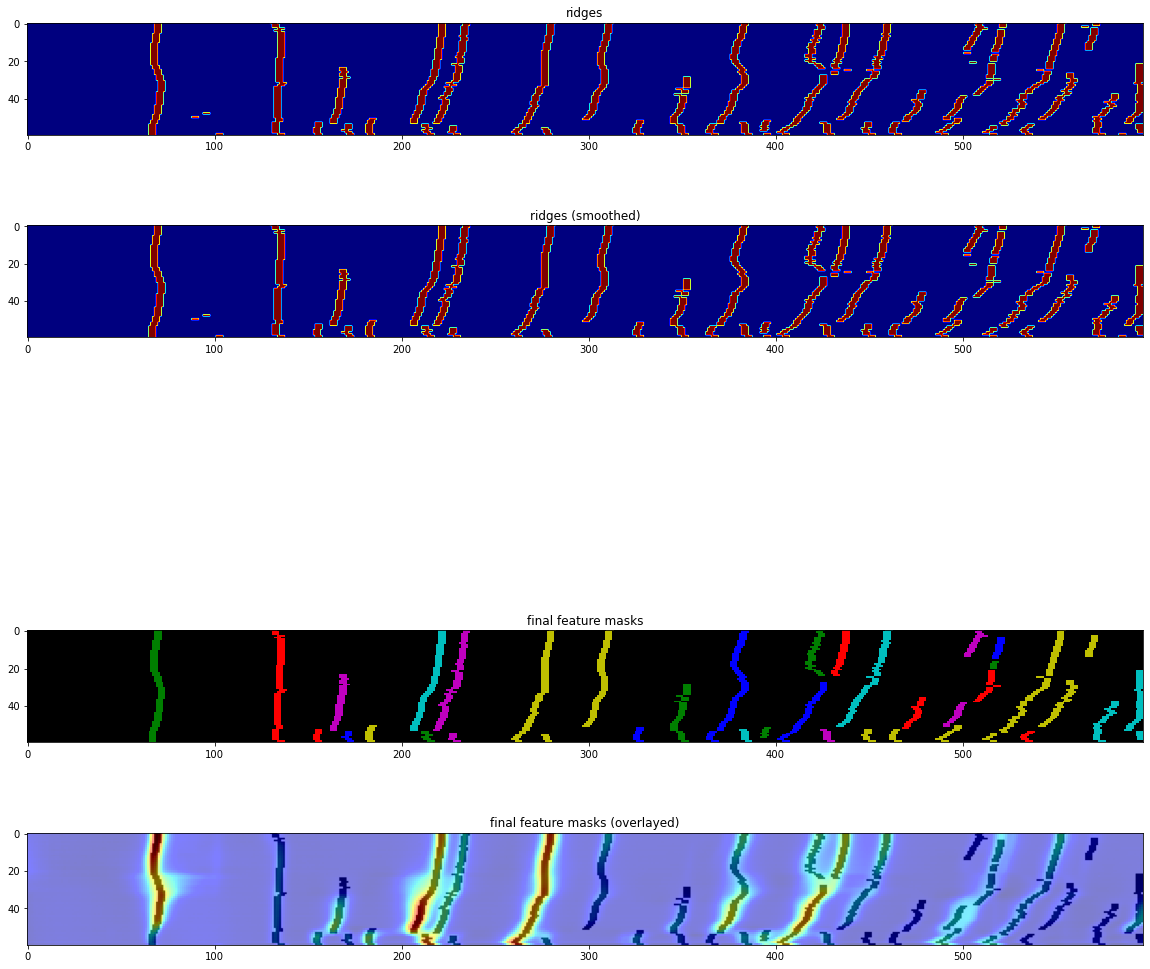

In [11]:
fsub_stop_2d = pf.curvefit_2d((patterns - 0), stdratio_threshold = 2, noise_estimate = fast_T,
                   background = slow_q, bg_shift_pos = False)

patterns_pp = fast_q - fast_q.min()
patterns_pp /= patterns_pp.mean()
fitlists = fsub_stop_2d[1]
labeled, feature_masks, activations, norm_, activations_n1 = feat.peakfit_featurize(patterns_pp, fitlists,
                                                                    size_thresh = 3)

straightened_heatmap = feat.get_peakshift_corrected_heatmap(patterns, activations, labeled)

In [149]:
def cosine_error(arr, error):
    norm = np.linalg.norm(arr, axis = 1)
    
    errorA = np.dot(arr, error.T) / np.outer(norm, norm)
    errorB = np.dot(error, arr.T) / np.outer(norm, norm)

    qsum = np.sqrt(errorA**2 + errorB**2)

In [162]:
arr, error = activations_n1.T, uncertainty.T

norm = np.linalg.norm(arr, axis = 1)

errorA = np.dot(arr, error.T) / np.outer(norm, norm)
errorB = np.dot(error, arr.T) / np.outer(norm, norm)

qsum = np.sqrt(errorA**2 + errorB**2)

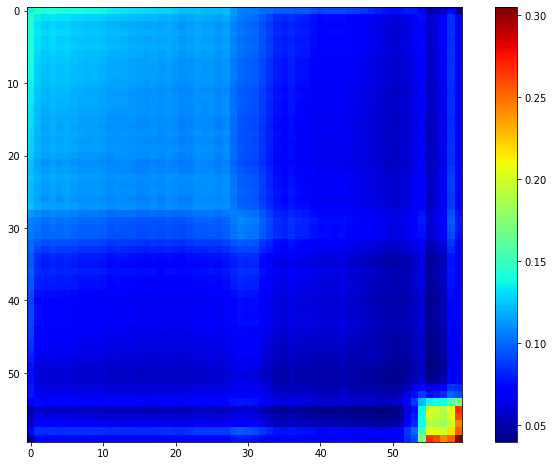

In [163]:
plt.imshow(qsum, cmap = 'jet')#, vmax = .2)
plt.colorbar()

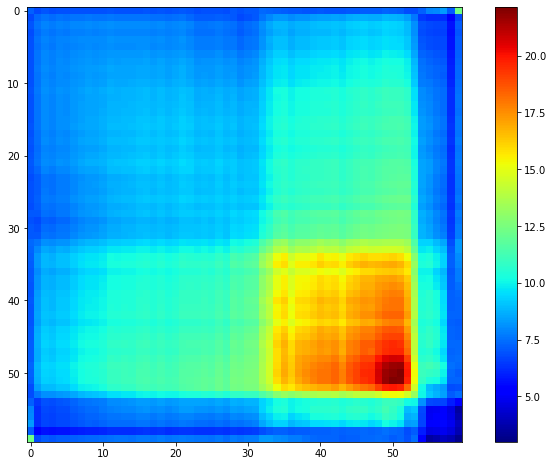

In [166]:
plt.imshow(feat.csim_pairs(activations_n1.T) / qsum, cmap = 'jet', vmin = 3)
plt.colorbar()

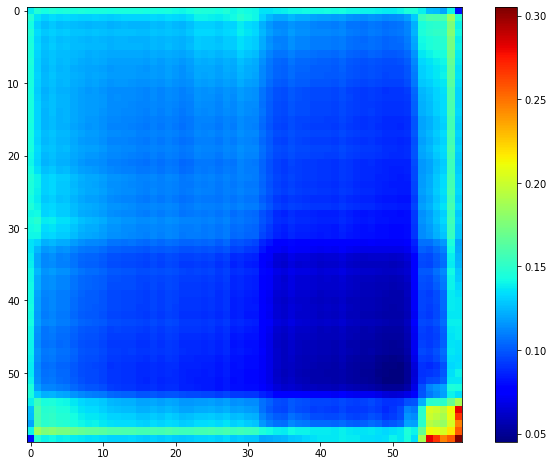

In [168]:
plt.imshow(qsum / feat.csim_pairs(activations_n1.T) , cmap = 'jet')
plt.colorbar()

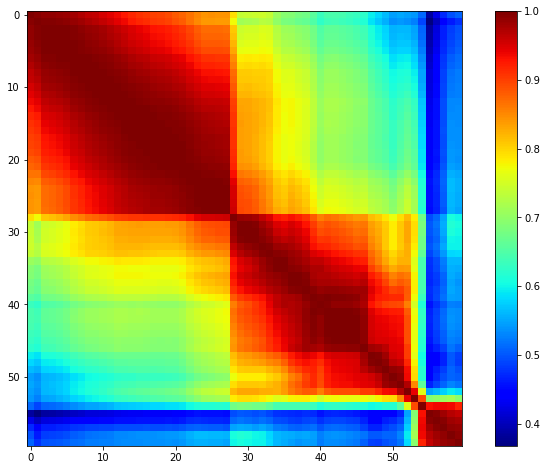

In [169]:
plt.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
plt.colorbar()

Text(0.5, 1.0, 'Noise amplitude (relative)')

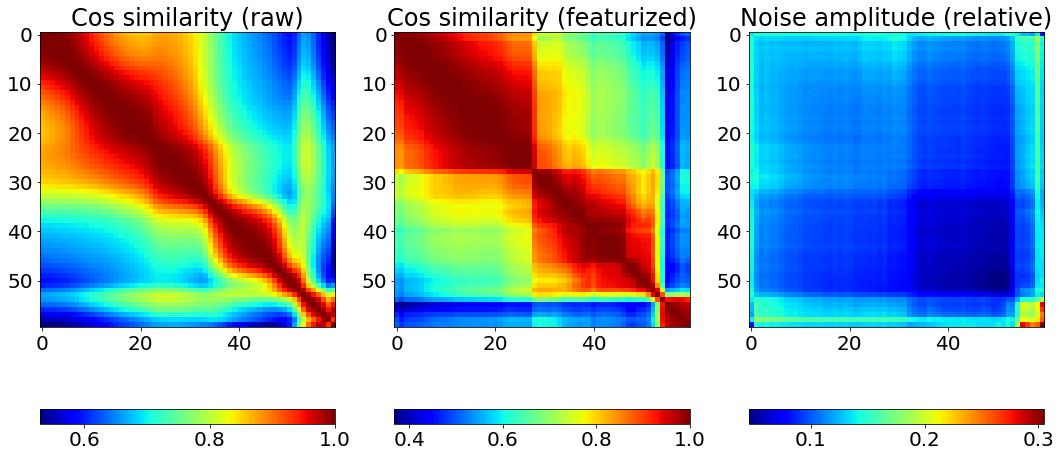

In [191]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"]=(18,10)

a, b = 1, 3

plt.subplot(a, b, 1)
plt.imshow(feat.csim_pairs(patterns), cmap = 'jet')
plt.title('Cos similarity (raw)')
plt.colorbar(shrink = 1, orientation = 'horizontal')


plt.subplot(a, b, 2)
plt.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
plt.title('Cos similarity (featurized)')
plt.colorbar(shrink = 1, orientation = 'horizontal')


plt.subplot(a, b, 3)
plt.imshow(qsum / feat.csim_pairs(activations_n1.T), cmap = 'jet')
plt.colorbar(shrink = 1, orientation = 'horizontal')
plt.title('Noise amplitude (relative)')


In [220]:
def heatmap(fig, arr, label = '', **kwargs):
    ax = fig

    stride = 100
    #qticks = d3d.q[::stride]
    qticks = qq[::stride]
    labels = ['{:0.1f}'.format(elt) for elt in qticks]
    
    print(len(labels), len(qticks))
    ax.set_xticklabels(labels);
    ax.set_xticks(np.arange(len(qticks)) * stride);
    if kwargs is not None:
        (kwargs.update(imargs))
    else:
        kwargs = imargs
    plt.imshow(arr, **kwargs)
    plt.title(label)
    annotate()

In [221]:
def annotate():
    plt.xlabel('$q~(1 / A)$')
    plt.ylabel('sample index')
    
heatmap(ax, patterns)

6 6


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (6).

In [207]:
imargs = {'cmap': 'jet', 'aspect': 8}


#ax50 = fig.add_subplot(spec[5:7, 0])
img = ax.imshow(patterns, cmap = 'jet')
#plt.title('Cos similarity (raw)')
#plt.colorbar(img, ax = ax50)

Text(0.5, 1.0, 'Cos similarity (raw)')

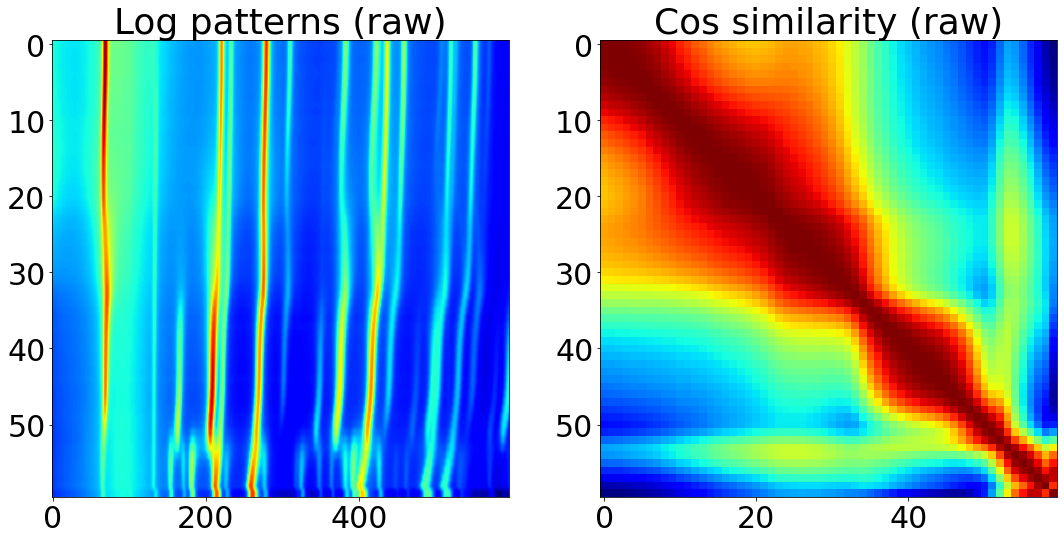

In [235]:
a, b = 1, 2
plt.rcParams["figure.figsize"]=(18,10)
matplotlib.rcParams.update({'font.size': 30})


ax = plt.subplot(a, b, 1)
plt.imshow(np.log(1 + patterns), cmap = 'jet', aspect = patterns.shape[1] / patterns.shape[0])
plt.title('Log patterns (raw)')


plt.subplot(a, b, 2)
#plt.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
plt.imshow(feat.csim_pairs(patterns), cmap = 'jet')
plt.title('Cos similarity (raw)')
#plt.colorbar(shrink = 1, orientation = 'horizontal')


# plt.subplot(a, b, 3)
# plt.imshow(qsum / feat.csim_pairs(activations_n1.T), cmap = 'jet')
# plt.colorbar(shrink = 1, orientation = 'horizontal')
# plt.title('Noise amplitude (relative)')
